In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Exploring wage dataset from ***INTRO TO STATISTICAL LEARNING BOOK***

In [3]:
df_wage = pd.read_csv('wage.csv')

In [4]:
df_wage.head(5)

,year,age,sex,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Male,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Male,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,1. Male,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,1. Male,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,1. Male,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154


In [5]:
df_wage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
year          3000 non-null int64
age           3000 non-null int64
sex           3000 non-null object
maritl        3000 non-null object
race          3000 non-null object
education     3000 non-null object
region        3000 non-null object
jobclass      3000 non-null object
health        3000 non-null object
health_ins    3000 non-null object
logwage       3000 non-null float64
wage          3000 non-null float64
dtypes: float64(2), int64(2), object(8)
memory usage: 281.3+ KB


In [6]:
df_wage.describe(include=['object'])

,sex,maritl,race,education,region,jobclass,health,health_ins
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,1,5,4,5,1,2,2,2
top,1. Male,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes
freq,3000,2074,2480,971,3000,1544,2142,2083


#### Features Male and Region are constant in this data set.

In [7]:
#Look at all available Plotting style
plt.style.available

['fast',
 'Solarize_Light2',
 'seaborn-deep',
 'seaborn-notebook',
 'dark_background',
 'seaborn-talk',
 'seaborn-whitegrid',
 'ggplot',
 'seaborn-dark-palette',
 'classic',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-muted',
 'seaborn-white',
 'grayscale',
 'seaborn',
 'seaborn-ticks',
 'seaborn-poster',
 'seaborn-bright',
 '_classic_test',
 'seaborn-dark',
 'fivethirtyeight',
 'seaborn-colorblind',
 'bmh',
 'seaborn-paper']

In [8]:
plt.style.use('classic')

In [9]:
# reshape data to plot correctly
df_edu = df_wage.pivot(columns = 'education',values= 'wage')

In [10]:
df_edu.head()

education,1. < HS Grad,2. HS Grad,3. Some College,4. College Grad,5. Advanced Degree
0,75.043154,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,70.476020,NaN
2,NaN,NaN,130.982177,NaN,NaN
3,NaN,NaN,NaN,154.685293,NaN
4,NaN,75.043154,NaN,NaN,NaN


In [11]:
#importing statsmodel library to fit lowess curve through data
import statsmodels.api as sm

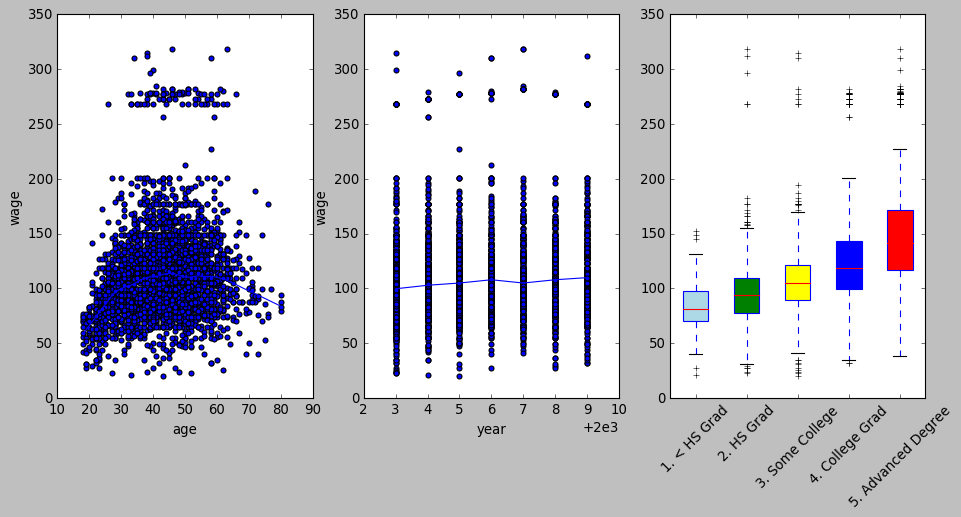

In [12]:
fig,ax = plt.subplots(1,3,figsize=(14,6))

df_wage.plot.scatter('age','wage',ax=ax[0])
lowess = sm.nonparametric.lowess(df_wage['wage'], df_wage['age'], frac=.2)
ax[0].plot(lowess[:, 0], lowess[:, 1])

df_wage.plot.scatter('year', 'wage', ax=ax[1])
year_median = df_wage.groupby('year')['wage'].median()
ax[1].plot(year_median)


boxplot = df_edu.plot.box(ax=ax[2], rot=45, patch_artist=True)
colors = ['lightblue', 'green', 'yellow', 'blue', 'red']
for artist, color in zip(boxplot.artists, colors):
    artist.set_facecolor(color)




In [13]:
import seaborn as sns

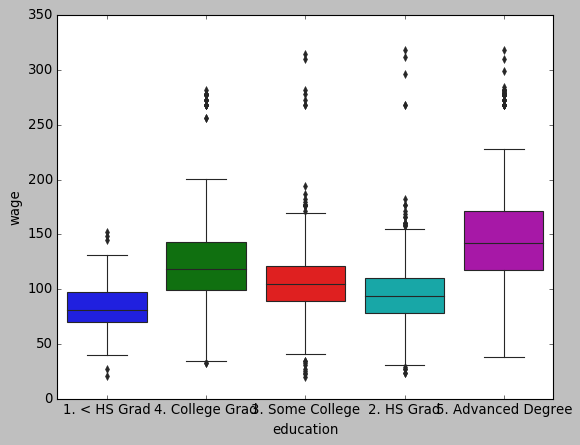

In [14]:
sns.boxplot('education', 'wage', data=df_wage);

In [15]:
df1 = df_wage[['age', 'year', 'education', 'wage']]

In [16]:
df1.head()

,age,year,education,wage
0,18,2006,1. < HS Grad,75.043154
1,24,2004,4. College Grad,70.476020
2,45,2003,3. Some College,130.982177
3,43,2003,4. College Grad,154.685293
4,50,2005,2. HS Grad,75.043154


In [17]:
#pd.melt takes a variable column or columns and generate two columns,in which one has column name-'variable' and the other contains 'value'

df_melt = pd.melt(df1, id_vars=['education', 'wage'])

In [18]:
df_melt.head()

,education,wage,variable,value
0,1. < HS Grad,75.043154,age,18
1,4. College Grad,70.476020,age,24
2,3. Some College,130.982177,age,45
3,4. College Grad,154.685293,age,43
4,2. HS Grad,75.043154,age,50


In [19]:
df_melt.tail()

,education,wage,variable,value
5995,3. Some College,154.685293,year,2008
5996,2. HS Grad,99.689464,year,2007
5997,1. < HS Grad,66.229408,year,2005
5998,3. Some College,87.981033,year,2005
5999,2. HS Grad,90.481913,year,2009


/home/nbuser/anaconda3_420/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


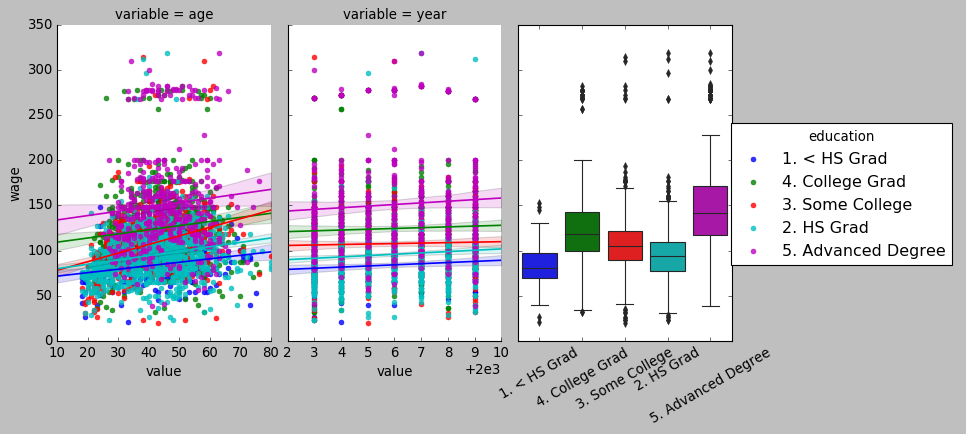

In [20]:
seaborn_grid = sns.lmplot('value', 'wage', col='variable', hue='education', data=df_melt, sharex=False)
seaborn_grid.fig.set_figwidth(8)

left, bottom, width, height = seaborn_grid.fig.axes[0]._position.bounds
left2, bottom2, width2, height2 = seaborn_grid.fig.axes[1]._position.bounds
left_diff = left2 - left
seaborn_grid.fig.add_axes((left2 + left_diff, bottom, width, height))

sns.boxplot('education', 'wage', data=df_wage, ax = seaborn_grid.fig.axes[2])
ax2 = seaborn_grid.fig.axes[2]
ax2.set_yticklabels([])
ax2.set_xticklabels(ax2.get_xmajorticklabels(), rotation=30)
ax2.set_ylabel('')
ax2.set_xlabel('');

leg = seaborn_grid.fig.legends[0]
leg.set_bbox_to_anchor([0, .1, 1.5,1])    

### Exploring stock market data which is a Classification problem

In [21]:
df_smarket = pd.read_csv('smarket.csv')

In [22]:
df_smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [23]:
df_smarket_pivot = pd.melt(df_smarket,id_vars='Direction',
                           value_vars = ['Lag1','Lag2','Lag3'],
                           var_name = 'Lag Type',
                           value_name = 'Pct change')

In [25]:
df_smarket_pivot.head()

,Direction,Lag Type,Pct change
0,Up,Lag1,0.381
1,Up,Lag1,0.959
2,Down,Lag1,1.032
3,Up,Lag1,-0.623
4,Up,Lag1,0.614


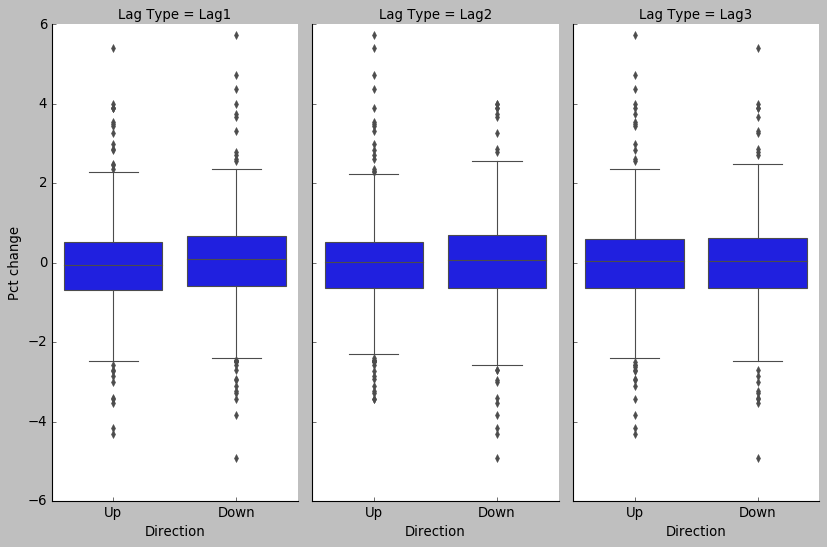

In [31]:
g = sns.FacetGrid(df_smarket_pivot,col='Lag Type',size =7,aspect = .5)
g = g.map(sns.boxplot,'Direction','Pct change')

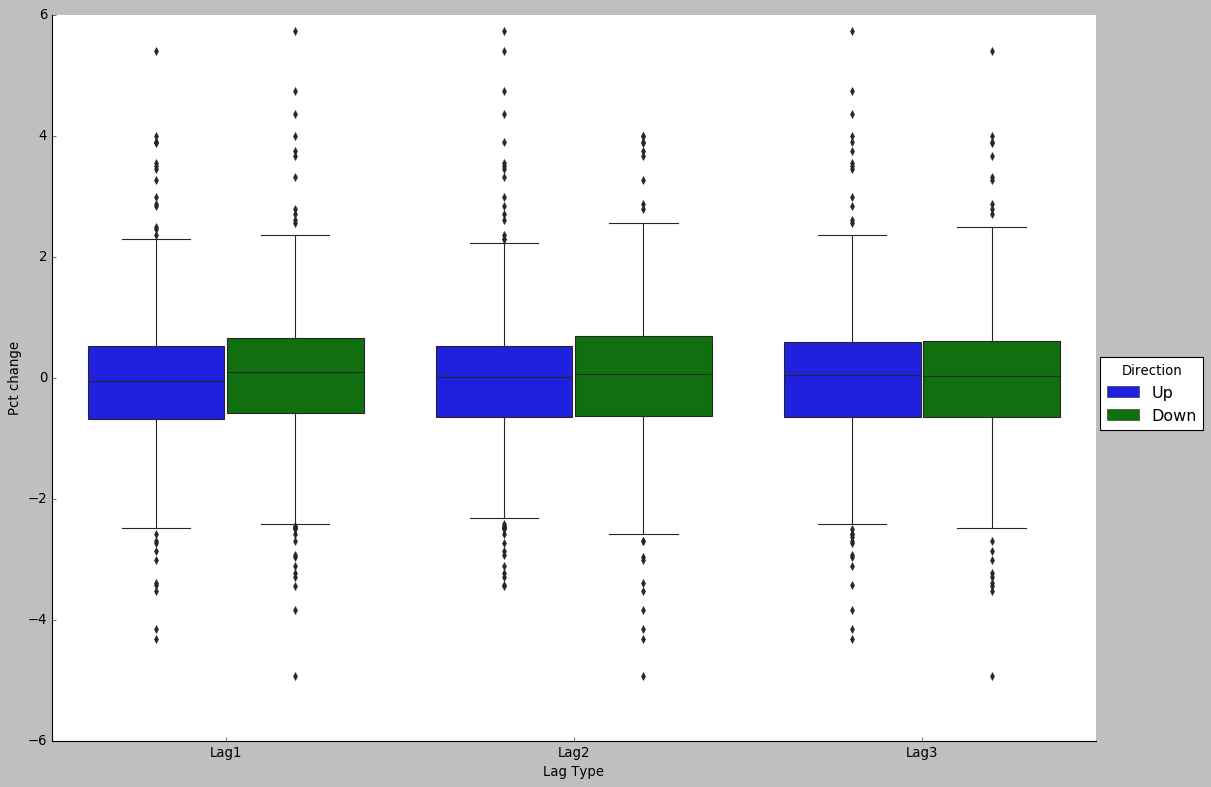

In [33]:
sns.factorplot(x="Lag Type", y="Pct change", hue="Direction",data=df_smarket_pivot, kind="box", size=10, aspect=1.4)

## Clustering 

__Genes data,Exploring Similarities__

In [36]:
df_genes = pd.read_csv('nci60_data.csv', index_col=0)

In [37]:
df_genes.head()

,1,2,3,4,5,6,7,8,9,10,...,6821,6822,6823,6824,6825,6826,6827,6828,6829,6830
V1,0.300000,1.180000,0.550000,1.140000,-0.265000,-7.000000e-02,0.350000,-0.315000,-0.450000,-0.654981,...,-0.990019,0.000000,0.030000,-0.175000,0.629981,-0.030000,0.000000,0.280000,-0.340000,-1.930000
V2,0.679961,1.289961,0.169961,0.379961,0.464961,5.799610e-01,0.699961,0.724961,-0.040039,-0.285020,...,-0.270058,-0.300039,-0.250039,-0.535039,0.109941,-0.860039,-1.250049,-0.770039,-0.390039,-2.000039
V3,0.940000,-0.040000,-0.170000,-0.040000,-0.605000,0.000000e+00,0.090000,0.645000,0.430000,0.475019,...,0.319981,0.120000,-0.740000,-0.595000,-0.270020,-0.150000,0.000000,-0.120000,-0.410000,0.000000
V4,0.280000,-0.310000,0.680000,-0.810000,0.625000,-1.387779e-17,0.170000,0.245000,0.020000,0.095019,...,-1.240020,-0.110000,-0.160000,0.095000,-0.350020,-0.300000,-1.150010,1.090000,-0.260000,-1.100000
V5,0.485000,-0.465000,0.395000,0.905000,0.200000,-5.000000e-03,0.085000,0.110000,0.235000,1.490019,...,0.554980,-0.775000,-0.515000,-0.320000,0.634980,0.605000,0.000000,0.745000,0.425000,0.145000


In [40]:
from sklearn.decomposition import PCA

In [41]:
pca = PCA(2)

In [42]:
df_genes_transformed = pd.DataFrame(pca.fit_transform(df_genes), columns=['PC1', 'PC2'])

In [43]:
from sklearn.cluster import KMeans

In [44]:
kmeans = KMeans(4)

In [45]:
kmeans.fit(df_genes_transformed)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [46]:
kmeans.labels_

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       0, 0, 2, 0, 2, 2, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [47]:
df_genes_transformed['cluster'] = kmeans.labels_

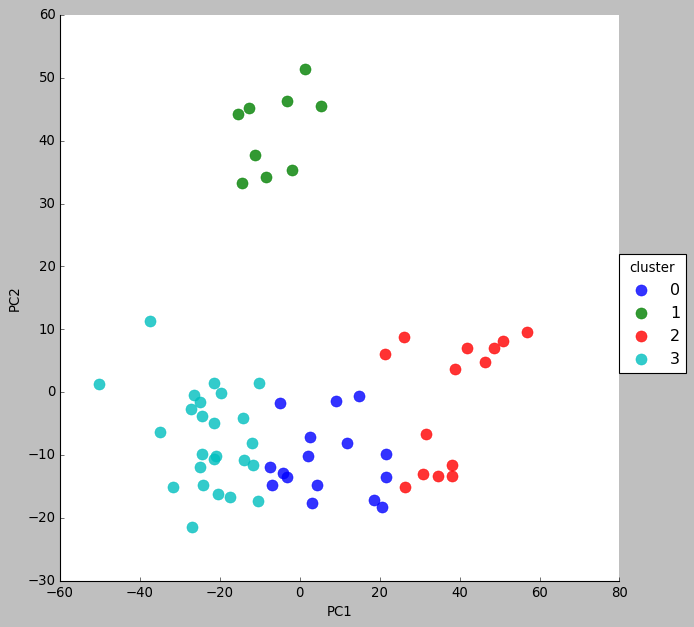

In [48]:
sns.lmplot('PC1', 'PC2', df_genes_transformed, fit_reg=False, hue='cluster', size=8, 
           scatter_kws={"marker": "D", "s": 100})